## 1 - Optical-Flow

In [1]:
from IPython.display import clear_output
# Import the required modules
%pylab inline 
import cv2
from IPython.display import clear_output
#import time
class Optical_flow():
    def __init__(self):
        # Parameters for lucas kanade optical flow
        self.lk_params = dict( winSize  = (15,15),
                          maxLevel = 2,
                          criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

        # Create some random colors
        self.color = np.random.randint(0,255,(100,3))

    def calc_lucas_kened(self,old_gray,frame,p0,mask):
        
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #frame in gray_color
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, ** self.lk_params)
        #p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]

        # draw the tracks
        for i,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), self.color[i].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,self.color[i].tolist(),-1)
        img = cv2.add(frame,mask)
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
        return [img,old_gray,p0,mask]
    def print_img(self,img):
        try:
            axis('off')
            # Title of the window
            title("Vídeo")
            # Display the frame
            imshow(img)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
        except:
            pass


Populating the interactive namespace from numpy and matplotlib


## Exemplo 01, rastrando um ponto da janela

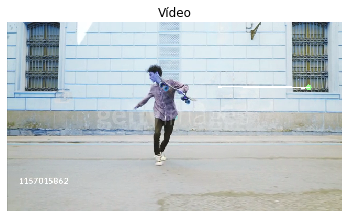

In [3]:
#vídeo de exemplo
cap = cv2.VideoCapture('videos/test2.mp4')

op = Optical_flow()
ret, fist_frame  = cap.read()
old_gray = cv2.cvtColor(fist_frame, cv2.COLOR_BGR2GRAY)
#define o ponto a ser rastreado
p0 = np.array([array([[403., 123.]], dtype=float32)])#, array([[ 26., 302.]], dtype=float32), array([[ 63., 297.]], dtype=float32), array([[ 71., 304.]], dtype=float32), array([[ 19., 302.]], dtype=float32), array([[ 34., 300.]], dtype=float32), array([[168., 345.]], dtype=float32), array([[ 59., 305.]], dtype=float32), array([[ 45., 317.]], dtype=float32), array([[428., 143.]], dtype=float32), array([[377., 143.]], dtype=float32), array([[362., 244.]], dtype=float32), array([[ 53., 317.]], dtype=float32), array([[ 78., 155.]], dtype=float32), array([[148., 164.]], dtype=float32), array([[330., 247.]], dtype=float32), array([[172., 304.]], dtype=float32), array([[76., 13.]], dtype=float32), array([[ 39., 312.]], dtype=float32), array([[171., 164.]], dtype=float32), array([[205., 239.]], dtype=float32), array([[448., 157.]], dtype=float32), array([[390., 139.]], dtype=float32), array([[81., 30.]], dtype=float32), array([[190., 156.]], dtype=float32), array([[ 77., 147.]], dtype=float32), array([[441., 153.]], dtype=float32), array([[  7., 310.]], dtype=float32), array([[412., 143.]], dtype=float32)])
mask = np.zeros_like(fist_frame)
#define qtd de frames a serem visualizados
for i in range(100):
    ret, frame  = cap.read()
    result = op.calc_lucas_kened(old_gray,frame,p0,mask)
    img,old_gray,p0,mask = result[0],result[1],result[2],result[3]
    op.print_img(img)


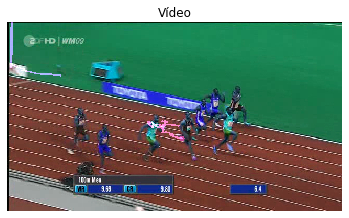

In [7]:
import os
path_video = 'videos/bolt_video/'
data_names = os.listdir(path_video)
op = Optical_flow()
fist_frame  = cv2.imread(path_video+data_names[0]) 
old_gray = cv2.cvtColor(fist_frame, cv2.COLOR_BGR2GRAY)
p0 = np.array([array([[328., 198.]], dtype=float32),array([[102., 102.]], dtype=float32)])#, array([[ 26., 302.]], dtype=float32), array([[ 63., 297.]], dtype=float32), array([[ 71., 304.]], dtype=float32), array([[ 19., 302.]], dtype=float32), array([[ 34., 300.]], dtype=float32), array([[168., 345.]], dtype=float32), array([[ 59., 305.]], dtype=float32), array([[ 45., 317.]], dtype=float32), array([[428., 143.]], dtype=float32), array([[377., 143.]], dtype=float32), array([[362., 244.]], dtype=float32), array([[ 53., 317.]], dtype=float32), array([[ 78., 155.]], dtype=float32), array([[148., 164.]], dtype=float32), array([[330., 247.]], dtype=float32), array([[172., 304.]], dtype=float32), array([[76., 13.]], dtype=float32), array([[ 39., 312.]], dtype=float32), array([[171., 164.]], dtype=float32), array([[205., 239.]], dtype=float32), array([[448., 157.]], dtype=float32), array([[390., 139.]], dtype=float32), array([[81., 30.]], dtype=float32), array([[190., 156.]], dtype=float32), array([[ 77., 147.]], dtype=float32), array([[441., 153.]], dtype=float32), array([[  7., 310.]], dtype=float32), array([[412., 143.]], dtype=float32)])
mask = np.zeros_like(fist_frame)
#p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
for frame_img in data_names[1:150]:
    try:
        frame  = cv2.imread(path_video+frame_img) 
        result = op.calc_lucas_kened(old_gray,frame,p0,mask)
        img,old_gray,p0,mask = result[0],result[1],result[2],result[3]
        #print(i)
        op.print_img(img)
    except:
        pass